# Deep Q- learning Agent- Stock Trading

## precesseing Data

In [1]:
import pandas as pd
import sys

import pandas as pd

import math, random 
import numpy as np 
from datetime import datetime, timedelta


def get_data(file):
  df = pd.read_csv(file)
  return df


c:\Users\Johnson\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Johnson\anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\Johnson\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Look at the data of TSLA and META stock for checking anamolies (missing data etc.). Also convert date into right format

In [29]:
pd_data1 = get_data('./data/TSLA.csv')
pd_data2 = get_data('./data/META.csv')

print(pd_data1.head()) 
print(pd_data2.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2023-02-27  202.029999  209.419998  201.259995  207.630005  207.630005   
1  2023-02-28  210.589996  211.229996  203.750000  205.710007  205.710007   
2  2023-03-01  206.210007  207.199997  198.520004  202.770004  202.770004   
3  2023-03-02  186.740005  193.750000  186.009995  190.899994  190.899994   
4  2023-03-03  194.800003  200.479996  192.880005  197.789993  197.789993   

      Volume  
0  161028300  
1  153144900  
2  156852800  
3  181500700  
4  154193300  
         Date        Open        High         Low       Close   Adj Close  \
0  2023-02-27  171.880005  173.119995  169.059998  169.539993  169.539993   
1  2023-02-28  171.899994  177.550003  171.869995  174.940002  174.940002   
2  2023-03-01  174.589996  177.850006  173.050003  173.419998  173.419998   
3  2023-03-02  172.380005  175.009995  171.429993  174.529999  174.529999   
4  2023-03-03  178.919998  186.619995  177.050003  185.250000 

Statistical analysis of the data

In [3]:
pd_data1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02
mean,215.441600,219.565840,211.222959,215.529520,215.529520,1.325434e+08
std,40.237160,40.627362,39.478442,39.972980,39.972980,2.837691e+07
min,152.639999,160.479996,152.369995,153.750000,153.750000,8.316600e+07
25%,180.800003,186.220001,178.220001,183.250000,183.250000,1.114460e+08
50%,200.100006,207.199997,197.529999,203.929993,203.929993,1.282597e+08
75%,252.039993,259.880005,250.490005,255.899994,255.899994,1.533641e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


In [30]:
pd_data2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02
mean,252.501201,256.175440,249.263200,252.792960,252.792960,2.499231e+07
std,44.348698,44.625893,43.274045,43.755868,43.755868,1.067617e+07
min,171.880005,173.119995,169.059998,169.539993,169.539993,8.629300e+06
25%,213.470001,215.660004,210.660004,213.070007,213.070007,1.792460e+07
50%,252.929993,255.619995,249.169998,252.690002,252.690002,2.159120e+07
75%,292.549988,297.399994,286.750000,290.529999,290.529999,2.738970e+07
max,325.119995,326.200012,317.589996,325.480011,325.480011,7.119650e+07


Make sure that both the stock data is for the same time period and same days in this time period. Remove data if necessary

In [4]:
# Drop Data that is not in both stock data sets
pd_data1 = pd_data1[pd_data1['Date'].isin(pd_data2['Date'])]
pd_data2 = pd_data2[pd_data2['Date'].isin(pd_data1['Date'])]

pd_data1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02
mean,215.441600,219.565840,211.222959,215.529520,215.529520,1.325434e+08
std,40.237160,40.627362,39.478442,39.972980,39.972980,2.837691e+07
min,152.639999,160.479996,152.369995,153.750000,153.750000,8.316600e+07
25%,180.800003,186.220001,178.220001,183.250000,183.250000,1.114460e+08
50%,200.100006,207.199997,197.529999,203.929993,203.929993,1.282597e+08
75%,252.039993,259.880005,250.490005,255.899994,255.899994,1.533641e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


In [5]:
# check for records of both stocks
print(pd_data1.shape)
print(pd_data2.shape)


(125, 7)
(125, 7)


Visualize the data to see how stock price changes with time
    

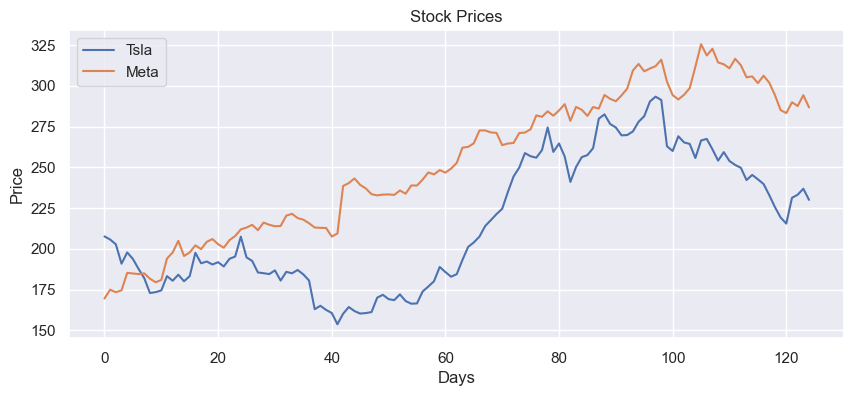

In [6]:
# data visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.plot(pd_data1['Close'])
plt.plot(pd_data2['Close'])
plt.title('Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['Tsla', 'Meta'], loc='upper left')
plt.show()


### Divide Training and test data

Next step is to divide data into training and test set. This has to be done in a chronological order. So, data is divided into:
- training set from days 0 to days 'training'
- test set: from days 'training' to day 'training+ test'

In [7]:
training = 65
#Training Data
pd_data1_train=pd_data1[0:training]
pd_data2_train=pd_data2[0:training]

In [8]:
test = 30
#Test Data
pd_data1_test=pd_data1[training:training+test]
pd_data2_test=pd_data2[training:training+test]

In [9]:
#Initialize state and set benchmarking model

start_balance = 10000

total_Prof=[]
done=False

batch_size = 64


#Initialize state and set benchmarking model


total_Prof=[]
done=False

Act_datasize = training # 1500 days of training data
print("Act_datasize=" + str(Act_datasize))
batch_size = 64

#Benchmark Model

data1_train=pd_data1_train['Open'] # open price of stock 1
data2_train=pd_data2_train['Open'] # open price of stock 2

data1_date=pd_data1_train['Date'] 
# print(data1_date)

# These lines calculate the initial number of stocks one could buy with a quarter of the starting balance (start_balance) 
Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_train[0]))  
Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_train[0]))
# Half of the starting balance is kept as open cash.
Act_Bench_Open_cash=start_balance/2  



### Program to calculate benchmark profit


#sell 20% of stock in 10 intervals

interval=int(Act_datasize/10) 
# print("interval=" + str(interval))
Total_Stock1_Amount= 0
Total_Stock2_Amount= 0
stocks2Value = 0
stocks1Value = 0

# Calculate 20% of the stocks one has in the beginning, as these amounts will be sold at each interval.
Act_stocks1=np.floor(Act_Bench_Stock1_Bal /20)
Act_stocks2=np.floor(Act_Bench_Stock2_Bal /20)
#print(str(Act_stocks1))
#print(str(Act_stocks2))

# Set the remaining stocks variables to their initial values.
remaining_stock1=Act_Bench_Stock1_Bal
remaining_stock2=Act_Bench_Stock2_Bal
ttl=0

Benchmark_Port_Value=[]


for j in range (interval,Act_datasize+1,interval): 
      #   print("closing prices : " + str(data1_train[j-1]) )
        Price_closing_Stock1=data1_train[j-1]
        Price_closing_Stock2=data2_train[j-1]
        
        date_stock1=data1_date[j-1]
      #   print(date_stock1)
                
        stocks1Value= Act_stocks1 * Price_closing_Stock1
        stocks2Value= Act_stocks2 * Price_closing_Stock2
        remaining_stock1=remaining_stock1-Act_stocks1
        remaining_stock2=remaining_stock2-Act_stocks2
        #print("J is:"+ str(j))
        
        
        
        Stock1_Port_value=remaining_stock1*Price_closing_Stock1
        Stock2_Port_value=remaining_stock2*Price_closing_Stock2
        Act_Bench_Open_cash=Act_Bench_Open_cash+stocks1Value+stocks2Value 
        
        Total_Portfolio_value=Act_Bench_Open_cash+Stock1_Port_value+Stock2_Port_value
        Benchmark_Port_Value.append([date_stock1,Total_Portfolio_value])
        


Training_Benchmark_Portfolio_Value= Total_Portfolio_value


print("Benchmark_Profit is  " + str(Training_Benchmark_Portfolio_Value) +"with Tsla Stocks:  " + str(remaining_stock1) + 
      " and Meta stocks:  "+ str(remaining_stock2) )


#Define arrays to store per episode values 
total_Prof=[]
total_stock1bal=[]
total_stock2bal=[]
total_open_cash=[]
total_port_value=[]
total_days_played=[]




Act_datasize=65
Benchmark_Profit is  10604.140019999999with Tsla Stocks:  12.0 and Meta stocks:  14.0


In [10]:
print(Benchmark_Port_Value)

[['2023-03-06', 10014.479916], ['2023-03-14', 9753.840004000001], ['2023-03-22', 10226.600036], ['2023-03-30', 10194.280094], ['2023-04-10', 10165.220121999999], ['2023-04-18', 10324.539984], ['2023-04-26', 9898.479916], ['2023-05-04', 10257.360056], ['2023-05-12', 10427.200153999998], ['2023-05-22', 10604.140019999999]]


## Defining the Agent

In [11]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam

import numpy as np
import random
from collections import deque

class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        self.state_size = state_size # normalized previous days
        self.action_size = 5 #  buy_1, sell_1,DO Nothing, buy2, sell2
        self.memory = deque(maxlen=2000)
        self.inventory1 = []
        self.inventory2 = []
        self.model_name = model_name
        self.is_eval = is_eval
        self.gamma = 0.95 #gamma is the discount factor. It quantifies how much importance we give for future rewards.
        self.epsilon = 1.0 #Exploration and Exploitation — Epsilon (ε)
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = load_model("models/" + model_name) if is_eval else self._model() #if is_eval is true, load the model, else create a new model

    def _model(self):
        model = Sequential()
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(lr=0.0001))
        return model

    def act(self, state):
        if not self.is_eval and random.random() <= self.epsilon: #Exploration and Exploitation
            #print("random action")
            return random.randrange(self.action_size) #random action
        #print("Calculating using model")
        options = self.model.predict(state) #predict action based on the current state
        #print(str(options))
        return np.argmax(options[0]) #returns the action with the highest probability

    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        
        mini_batch = random.sample(self.memory, batch_size)
        
        for state, action, reward, next_state, done in mini_batch:
            target = reward
            
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
              
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay 


## Defining state space and action space

In [12]:
import numpy as np
import random
import math, random 
import gym 
import numpy as np 


class State:
    def __init__(self, data1, data2, Bal_stock1, Bal_stock2, open_cash, timestep): 
        self.Stock1Price=data1[timestep] #stock 1 open price
        self.Stock2Price=data2[timestep] #stock 2 open price
        self.Stock1Blnc=Bal_stock1 #stock 1 balance
        self.Stock2Blnc=Bal_stock2 #stock 2 balance
        self.open_cash=open_cash #cash balance
        self.fiveday_stock1=self.five_day_window(data1, timestep) 
        self.fiveday_stock2=self.five_day_window(data2, timestep)
        #self.volume1=volume1[timestep]
        #self.volume2=volume2[timestep]
        self.portfolio_value=self.portfolio_value()

    def portfolio_value(self):
        pvalue=0
        #print("In portfolio func")
        #print("self.Stock1Price",self.Stock1Price, type(self.Stock1Price))
        #print("self.Stock1Blnc",self.Stock1Blnc[0], type(self.Stock1Blnc))

        v1=self.Stock1Price * float(self.Stock1Blnc)
        v2=self.Stock2Price * float(self.Stock2Blnc)
        v3=float(self.open_cash)
        return (v1+v2+v3)
    
    def next_opening_price(self):
        return [data1[timestep+1], data2[timestep+1]]
    
    def five_day_window(self,data, timestep):
        step = timestep
        if step < 5:
            return data[0]
        
        stock_5days = np.mean(data[step-5:step])
        #print("stock_5days=" + str(stock_5days))
        #print(stock_5days)

        #print(type(stock_5days))

        return stock_5days
    
    def reset(self):
        #self.state = torch.FloatTensor(torch.zeros(8)).cuda()
        self.Stock1Price=202.029999 #stock 1 open price TSLA
        self.Stock2Price=171.880005 #stock 2 open price META
        self.Stock1Blnc= 25#stock 1 balance TSLA
        self.Stock2Blnc= 28#stock 2 balance META
        self.open_cash=10000 #cash balance
        self.fiveday_stock1=202.029999
        self.fiveday_stock2=171.880005
        self.portfolio_value=10000
        
    def getState(self):
        #print("In get state")
        res=[] 
        res.append(self.Stock1Price) #stock 1 open price
        res.append(self.Stock2Price) #stock 2 open price
        res.append(self.Stock1Blnc) #stock 1 balance
        res.append(self.Stock2Blnc) #stock 2 balance
        res.append(self.open_cash) #cash balance
        res.append(self.fiveday_stock1)
        res.append(self.fiveday_stock2)        
        res.append(self.portfolio_value)


        res1=np.array([res])

        return res1

# Training Run

In [13]:
episode_count = 20

In [14]:
#Training run

import csv
import os


for e in range(episode_count + 1): #episode_count=20
    print("..........")
    print("Episode " + str(e) + "/" + str(episode_count))
    
    # These lines calculate the initial number of stocks one could buy with a quarter of the starting balance (start_balance) 
    Bal_stock1=int(np.floor((start_balance/4)/data1_train[0])) 
    Bal_stock2=int(np.floor((start_balance/4)/data2_train[0])) 
    open_cash=start_balance/2 
    
    datasize=training #Number of days of training data
    done=False
    total_profit = 0
    reward = 0
    
    #Initialize Agent
    agent = Agent(8) #State size is 8: [stock1, stock2, cash in hand, stock1 balance, stock2 balance, open cash, stock1 5 day average, stock2 5 day average]
    agent.inventory1 =[] 
    agent.inventory2 =[] 
    for i in range(Bal_stock1): 
        agent.inventory1.append(data1_train[0]) # add stock to inventory
    for i in range(Bal_stock2):
        agent.inventory2.append(data2_train[0]) # add stock to inventory
    
    
    #Timestep delta to make sure that with time reward increases for taking action
    #timestep_delta=0
    
    #Running episode over all days in the datasize=200
    for t in range(datasize): 

        state_class_obj= State(data1_train, data2_train, Bal_stock1, Bal_stock2, open_cash,t) #Create state class object    
        state_array_obj=state_class_obj.getState() # Get state array (stock 1 open price, stock 2 open price, stock 1 balance, stock 2 balance, cash in hand, five day average stock 1, five day average stock 2, portfolio value)
        action = agent.act(state_array_obj) # return action from agent class
                   
        change_percent_stock1=(state_class_obj.Stock1Price-state_class_obj.fiveday_stock1)/state_class_obj.fiveday_stock1*100 #calculate percentage change in stock 1 price
        change_percent_stock2=(state_class_obj.Stock2Price-state_class_obj.fiveday_stock2)/state_class_obj.fiveday_stock2*100 #calculate percentage change in stock 2 price
        
        
        if action == 0:  #buy stock 1
            if state_class_obj.Stock1Price > state_class_obj.open_cash:
                '''
                print("Buy stock 1 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                '''

                reward=-500000
                done = True
                #end episode
                     
            else:

                agent.inventory1.append(data1_train[t])
                Bal_stock1_t1= len(agent.inventory1)
                Bal_stock2_t1=len(agent.inventory2)
                open_cash_t1=state_class_obj.open_cash-state_class_obj.Stock1Price #Here we are buying 1 stock
            
                
                if(state_class_obj.open_cash<500):
                    reward=-100000
                elif (abs(change_percent_stock1)<=2):
                    reward=-10000
                else:  
                    reward=-change_percent_stock1*100
                

               
                
        if action == 1:  #sell stock 1
            if state_class_obj.Stock1Blnc <1 :
                reward=-500000
                done = True
                #end episode
            else:

                bought_price1=agent.inventory1.pop(0)
                Bal_stock1_t1= len(agent.inventory1)
                Bal_stock2_t1=len(agent.inventory2)
                open_cash_t1=state_class_obj.open_cash+state_class_obj.Stock1Price #State[0] is the price of stock 1. Here we are buying 1 stoc
          
                if(state_class_obj.Stock1Blnc<10):
                    reward=-100000
                elif (abs(change_percent_stock1)<=2):
                    reward=-10000
                else:
                    reward=change_percent_stock1*100 #State[0] is the price of stock 1. Here we are buying 1 stock

                
        
        if action == 2:             # Do nothing action    
                if (abs(change_percent_stock1)<=2) and (abs(change_percent_stock2)<=2):
                    reward=10000
                elif (state_class_obj.open_cash<0.1*start_balance):
                    reward=1000000
                elif (abs(change_percent_stock1)<=2) or (abs(change_percent_stock2)<=2):
                    reward=1000
                else:
                    reward=-100000
                
                Bal_stock1_t1= len(agent.inventory1)
                Bal_stock2_t1=len(agent.inventory2)
                open_cash_t1=open_cash
               # print("Do nothing")
        
        
        if action == 3:  #buy stock 2
            if state_class_obj.Stock2Price > state_class_obj.open_cash:
                '''
                print("Buy stock 2 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                
                '''

                reward=-500000
                done = True
                     #end episode   
            else:

                agent.inventory2.append(data2_train[t])
                Bal_stock1_t1= len(agent.inventory1)
                Bal_stock2_t1=len(agent.inventory2)
                open_cash_t1=state_class_obj.open_cash-state_class_obj.Stock2Price
                
                if(state_class_obj.open_cash<5000):
                    reward=-100000
                elif (abs(change_percent_stock2)<=2):
                    reward=-10000
                else:
                    reward=-change_percent_stock2*100
 
        
        if action == 4:  #sell stock 2
            if state_class_obj.Stock2Blnc <1 :

                    reward=-500000
                    done = True
                #end episode
            else:

                bought_price2=agent.inventory2.pop(0)
                Bal_stock1_t1= len(agent.inventory1)
                Bal_stock2_t1=len(agent.inventory2)
                open_cash_t1=state_class_obj.open_cash+state_class_obj.Stock2Price
    
              
                if(state_class_obj.Stock2Blnc<10):
                    reward=-100000
                elif (abs(change_percent_stock2)<=2):
                    reward=-10000
                else:
                    reward=change_percent_stock2*100 
                
                
                total_profit += state_class_obj.Stock2Price - bought_price2

               # print("reward for selling stock2: " + str(reward))
            
        
        if t == datasize-1: #If it is the last day of the training data
            #print("t==datasize")
            done=True
            next_state_class_obj=State(data1_train, data2_train, Bal_stock1_t1, Bal_stock2_t1, open_cash_t1,t) #Create state class object
            next_state_array_obj=next_state_class_obj.getState()
        else:
            next_state_class_obj=State(data1_train, data2_train, Bal_stock1_t1, Bal_stock2_t1, open_cash_t1,t+1) #Create state class object
            next_state_array_obj=next_state_class_obj.getState()
            
        agent.memory.append((state_array_obj, action, reward, next_state_array_obj, done))
        #print("Action is "+str(action)+" reward is" + str(reward))
         
        Bal_stock1=Bal_stock1_t1 #update stock1 balance
        Bal_stock2= Bal_stock2_t1 #update stock2 balance
        open_cash=open_cash_t1 #update open cash balance
             
        
        
        if done==True: 

            total_Prof.append(total_profit) 
            total_stock1bal.append(len(agent.inventory1))
            total_stock2bal.append(len(agent.inventory2))
            total_open_cash.append(state_class_obj.open_cash)
            total_port_value.append(state_class_obj.portfolio_value)
            total_days_played.append(t)


            print("--------------------------------")
            state_class_obj.reset()
            break
           
          

        if len(agent.memory) > batch_size: # If the memory is greater than the batch size, then train the model
            agent.expReplay(batch_size) 


    if e % 10 == 0:
        model_path = "./models/model_ep" + str(e) 
        agent.model.save(model_path)


..........
Episode 0/20
--------------------------------
INFO:tensorflow:Assets written to: ./models/model_ep0\assets


INFO:tensorflow:Assets written to: ./models/model_ep0\assets


..........
Episode 1/20
--------------------------------
..........
Episode 2/20
--------------------------------
..........
Episode 3/20
--------------------------------
..........
Episode 4/20


--------------------------------
..........
Episode 5/20
--------------------------------
..........
Episode 6/20


--------------------------------
..........
Episode 7/20


--------------------------------
..........
Episode 8/20
--------------------------------
..........
Episode 9/20


--------------------------------
..........
Episode 10/20
--------------------------------
INFO:tensorflow:Assets written to: ./models/model_ep10\assets


INFO:tensorflow:Assets written to: ./models/model_ep10\assets


..........
Episode 11/20
--------------------------------
..........
Episode 12/20
--------------------------------
..........
Episode 13/20
--------------------------------


..........
Episode 14/20
--------------------------------
..........
Episode 15/20
--------------------------------
..........
Episode 16/20
--------------------------------
..........
Episode 17/20


--------------------------------
..........
Episode 18/20
--------------------------------
..........
Episode 19/20
--------------------------------
..........
Episode 20/20
--------------------------------
INFO:tensorflow:Assets written to: ./models/model_ep20\assets


INFO:tensorflow:Assets written to: ./models/model_ep20\assets


In [15]:
print("Total Tesla stocks in episodes"+ str(total_stock1bal))
print("Total Meta stocks in episodes"+ str(total_stock2bal))
print("Total Open cash in episodes"+ str(total_open_cash))
print("Total Portfolio value in episodes"+ str(total_port_value))
print("Total Days in episodes"+ str(total_days_played))

print("Benchmark_Profit is  " + str(int(Training_Benchmark_Portfolio_Value)) +"   with remaining Tesla Stocks: " + str(remaining_stock1) + 
      "   and remaining Meta stocks: "+ str(remaining_stock2) )

Total Tesla stocks in episodes[15, 20, 2, 12, 17, 3, 12, 15, 4, 7, 15, 10, 24, 4, 13, 14, 10, 18, 21, 13, 13]
Total Meta stocks in episodes[12, 3, 9, 0, 14, 15, 17, 11, 14, 21, 25, 15, 12, 16, 23, 20, 20, 10, 19, 8, 9]
Total Open cash in episodes[4952.910052999995, 6031.729992999996, 7920.679980000002, 7910.999987, 3963.090027, 6558.169979, 4459.810044999999, 5443.469956000003, 6554.790025999996, 4433.820020000001, 1836.310010999999, 5011.229965, 3618.400023000001, 5971.760055000001, 2997.9399880000014, 3398.699998999999, 3754.8300030000005, 5084.240005999997, 2162.959993, 6263.309983000002, 6040.830005999997]
Total Portfolio value in episodes[10872.160142999994, 10629.380106999997, 10708.129992000002, 9841.799915, 11278.390135000001, 10937.119991, 11105.010116999998, 11162.620040000002, 11068.690049999997, 11604.870068, 11669.160107, 11191.080031000001, 11403.700161, 11016.160079000001, 11434.740066000002, 11505.100083, 11260.930069, 11138.440107999999, 11604.910125, 10721.36006100000

## Benchmark model for Actual Test Run

In [16]:
pd_data1_test=pd_data1_test.reset_index(drop=True) # reset index of test data
pd_data2_test=pd_data2_test.reset_index(drop=True) # reset index of test data

In [17]:
pd_data1_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-31,199.779999,203.949997,195.119995,203.929993,203.929993,150711700
1,2023-06-01,202.589996,209.800003,199.369995,207.520004,207.520004,148029900
2,2023-06-02,210.149994,217.250000,209.750000,213.970001,213.970001,164129000
3,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100
4,2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600


In [18]:
pd_data2_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-31,260.000000,265.000000,258.450012,264.720001,264.720001,25473700
1,2023-06-01,265.899994,274.000000,265.890015,272.609985,272.609985,25609500
2,2023-06-02,272.660004,275.350006,271.119995,272.609985,272.609985,19405300
3,2023-06-05,270.299988,275.570007,269.559998,271.390015,271.390015,20742900
4,2023-06-06,270.140015,276.570007,269.690002,271.119995,271.119995,19419000


In [19]:
#Initialize state and set benchmarking model

import datetime

#print(df_data1)
total_Prof=[]
done=False

Act_datasize = test 
batch_size = 64


#To be removed
#Sstart_balance=500

#Benchmark Model

# Take Opening price in a new variable
data1_test=pd_data1_test['Open']
data2_test=pd_data2_test['Open']

data1_date=pd_data1_test['Date']


Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_test[0]))
Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_test[0])) 
Act_Bench_Open_cash=start_balance/2




### Program to calculate benchmark profit


#sell 20% of stock in 10 intervals

interval=int(Act_datasize/10)  
Total_Stock1_Amount= 0
Total_Stock2_Amount= 0
stocks2Value = 0
stocks1Value = 0

Act_stocks1=np.floor(Act_Bench_Stock1_Bal /20) 
Act_stocks2=np.floor(Act_Bench_Stock2_Bal /20)


remaining_stock1=Act_Bench_Stock1_Bal
remaining_stock2=Act_Bench_Stock2_Bal
ttl=0

Benchmark_Port_Value=[]


for j in range (interval,Act_datasize+1,interval):
        #print("closing prices : " + str(data1_test[j-1]) )
        Price_closing_Stock1=data1_test[j-1]
        Price_closing_Stock2=data2_test[j-1]
        date_stock1=data1_date[j-1]
        #print(date_stock1)
        #np.array(pd_data1_test['Date'])
        
        stocks1Value= Act_stocks1 * Price_closing_Stock1
        stocks2Value= Act_stocks2 * Price_closing_Stock2
        remaining_stock1=remaining_stock1-Act_stocks1
        remaining_stock2=remaining_stock2-Act_stocks2
        #print("J is:"+ str(j))
        
        
        
        Stock1_Port_value=remaining_stock1*Price_closing_Stock1
        Stock2_Port_value=remaining_stock2*Price_closing_Stock2
        Act_Bench_Open_cash=Act_Bench_Open_cash+stocks1Value+stocks2Value #Adding 20% sold value into open cash
        
        Total_Portfolio_value=Act_Bench_Open_cash+Stock1_Port_value+Stock2_Port_value
        Benchmark_Port_Value.append([date_stock1,Total_Portfolio_value])
        



#print ("total_Test_Benchmark_amount : " +  str(Total_Portfolio_value))

Test_Benchmark_Portfolio_Value= Total_Portfolio_value




print("Benchmark_Profit is" + str(Test_Benchmark_Portfolio_Value) +"with remaining Tsla Stocks: " + str(remaining_stock1) + 
      " and remaining Meta stocks: "+ str(remaining_stock2) )


#Define arrays to store per episode values 
total_Prof=[]
total_stock1bal=[]
total_stock2bal=[]
total_open_cash=[]
total_port_value=[]
total_days_played=[]


print(episode_count)


Benchmark_Profit is11117.659907000001with remaining Tsla Stocks: 12.0 and remaining Meta stocks: 9.0
20


## Actual test Run

In [20]:
#Actual run

import csv
episode_count=0


#Define arrays to store per episode values 
total_Prof=[]
total_stock1bal=[]
total_stock2bal=[]
total_open_cash=[]
total_port_value=[]
total_days_played=[]

from keras.models import load_model

model_name='model_ep20'

model = load_model("models/" + model_name)

Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_test[0])) # 9
Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_test[0])) # 8
Act_Bench_Open_cash=start_balance/2


In [21]:
print("Act_Bench_Stock1_Bal=" + str(Act_Bench_Stock1_Bal))
print("Act_Bench_Stock2_Bal=" + str(Act_Bench_Stock2_Bal))

Act_Bench_Stock1_Bal=12
Act_Bench_Stock2_Bal=9


In [22]:
# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

In [23]:
#Actual run
import csv

episode_count=0


#Define arrays to store per episode values 
Act_total_Prof=[]
Act_total_stock1bal=[]
Act_total_stock2bal=[]
Act_total_open_cash=[]
Act_total_port_value=[]
Act_total_days_played=[]
actions_done_perday=[]
portfolio_value=[]

from keras.models import load_model

model_name='model_ep20'

model = load_model("models/" + model_name)

initial_cash = state_class_obj.portfolio_value #portfolio value on day 1
# initial_cash = start_balance

for e in range(1): #here we run only for 1 episode, as it is Test run

    Bal_stock1_t2=Act_Bench_Stock1_Bal 
    Bal_stock2_t2=Act_Bench_Stock2_Bal
    done=False
    open_cash_t2= Act_Bench_Open_cash  
    total_profit = 0
    reward = 0
    
    #Initialize Agent
    agent_test = Agent(8, is_eval=True, model_name=model_name)
    #agent = Agent(8)

    agent_test.inventory1 =[] 
    agent_test.inventory2 =[]
    for i in range(Bal_stock1_t2): # add stock1 to inventory
        agent_test.inventory1.append(data1_test[0])
    for i in range(Bal_stock2_t2): # add stock2 to inventory
        agent_test.inventory2.append(data2_test[0]) 
    
    
    #Timestep delta to make sure that with time reward increases for taking action
    timestep_delta=0
    
    #Running episode over all days in the datasize
    print("Act_datasize=" + str(Act_datasize))
    for t in range(Act_datasize): # 45 days of test data
        
        print("..........")
        
        print(pd_data1_test.iloc[t,0]) 
        state_class_obj= State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t) #Create state class object
        state_array_obj=state_class_obj.getState() # Get state array (stock 1 open price, stock 2 open price, stock 1 balance, stock 2 balance, cash in hand, five day average stock 1, five day average stock 2, portfolio value)
        action = agent_test.act(state_array_obj) # return action from agent class

        # print("Action is "+str(action))
        print("Total portfolio value: " + str(state_class_obj.portfolio_value)+ 
                  "  stock 1 number: " + str(len(agent_test.inventory1))
                   +"  stock 2 number: "+str(len(agent_test.inventory2))+"  open cash"+str(state_class_obj.open_cash))

                   
        change_percent_stock1=(state_class_obj.Stock1Price-state_class_obj.fiveday_stock1)/state_class_obj.fiveday_stock1*100 #calculate percentage change in stock 1 price
        change_percent_stock2=(state_class_obj.Stock2Price-state_class_obj.fiveday_stock2)/state_class_obj.fiveday_stock2*100 #calculate percentage change in stock 2 price
        
        
        
        if action == 0:  #buy stock 1
            if state_class_obj.Stock1Price > state_class_obj.open_cash:
                '''
                print("Buy stock 1 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                '''
              
                done = True
                #end episode
                     
            else:
                #print("In Buy stock 1")
                agent_test.inventory1.append(data1_test[t])
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash-state_class_obj.Stock1Price #Here we are buying 1 stock
                
                
               
                
        if action == 1:  #sell stock 1
            if state_class_obj.Stock1Blnc <1 :
               # print("sold stock 2 when it did not have stock 2, so bankrupt, end of episode")
                
                done = True
                #end episode
            else:
                #print("In sell stock 1")
                agent_test.inventory1.pop(0)

                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash+state_class_obj.Stock1Price #State[0] is the price of stock 1. Here we are buying 1 stoc
          
        
        if action == 2:             # Do nothing action    
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
               # print("Do nothing")
        
        
        if action == 3:  #buy stock 2
            if state_class_obj.Stock2Price > state_class_obj.open_cash:
                '''
                print("Buy stock 2 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                
                '''

                done = True
                     #end episode   
            else:
                #print("In Buy stock 2")
                agent.inventory2.append(data2_test[t])
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash-state_class_obj.Stock2Price
                
              
        
        if action == 4:  #sell stock 2
            if state_class_obj.Stock2Blnc <1 :
                    #print("sold stock 2 when it did not have stock 2, so bankrupt, end of episode")
                    done = True
                #end episode
            else:
                #print("In sell stock 2")
                agent_test.inventory2.pop(0)
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash+state_class_obj.Stock2Price

            

        if t == Act_datasize-1: #If it is the last day of the test data
            # print("t==datasize")
            done=True
            next_state_class_obj=State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t)
            next_state_array_obj=next_state_class_obj.getState()
        else:
            # print("t!=datasize"+str(open_cash_t2))
            next_state_class_obj=State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t+1)
            next_state_array_obj=next_state_class_obj.getState()
            
        #print("Action is "+str(action)+" reward is" + str(reward))
       
        
        actions_done_perday.append(action)
        portfolio_value.append(next_state_class_obj.portfolio_value) # portfolio value

        if done==True:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(next_state_class_obj.portfolio_value - initial_cash))
            print("Total No. of days played: " + str(t)+ "  out of overall days:  " + str(Act_datasize))
            print("Total portfolio value: " + str(next_state_class_obj.portfolio_value)+ 
                  "  stock 1 number: " + str(len(agent_test.inventory1))
                   +"  stock 2 number: "+str(len(agent_test.inventory2))+"  open cash"+str(next_state_class_obj.open_cash))

            Act_total_Prof.append(total_profit)
            Act_total_stock1bal.append(len(agent_test.inventory1))
            Act_total_stock2bal.append(len(agent_test.inventory2))
            Act_total_open_cash.append(state_class_obj.open_cash)
            Act_total_port_value.append(state_class_obj.portfolio_value)
            Act_total_days_played.append(t)


            print("--------------------------------")
            state_class_obj.reset()
            break



Act_datasize=30
..........
2023-05-31
1/1 [==============================] - 0s 80ms/step
Total portfolio value: 9737.359988  stock 1 number: 12  stock 2 number: 9  open cash5000.0
..........
2023-06-01
1/1 [==============================] - 0s 22ms/step
Total portfolio value: 9821.369901  stock 1 number: 11  stock 2 number: 9  open cash5199.779999
..........
2023-06-02
1/1 [==============================] - 0s 26ms/step
Total portfolio value: 9957.809970999999  stock 1 number: 10  stock 2 number: 9  open cash5402.369995
..........
2023-06-05
1/1 [==============================] - 0s 23ms/step
Total portfolio value: 10005.419908  stock 1 number: 9  stock 2 number: 9  open cash5612.519989
..........
2023-06-06
1/1 [==============================] - 0s 24ms/step
Total portfolio value: 9990.700119000001  stock 1 number: 8  stock 2 number: 9  open cash5830.319992000001
..........
2023-06-07
1/1 [==============================] - 0s 31ms/step
Total portfolio value: 10087.490108  stock 1 num

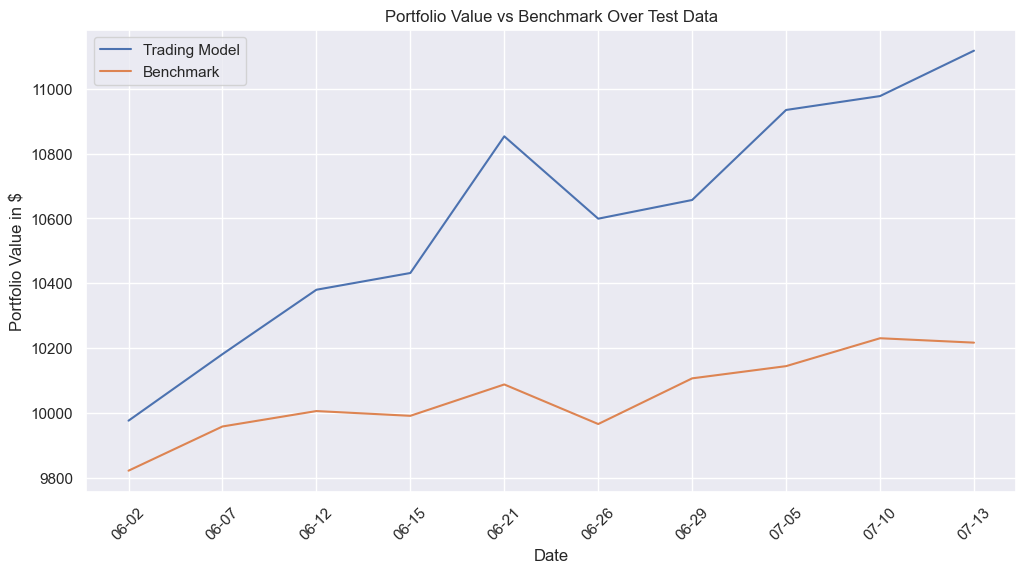

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the benchmark data
pd_bm = pd.DataFrame.from_records(Benchmark_Port_Value)
pd_bm[0] = pd.to_datetime(pd_bm[0]).dt.strftime('%Y-%m-%d').str[5:]

# Extract necessary data for plotting
df_plot = pd.DataFrame({
    'Date': pd_bm[0],
    'Trading Model': pd_bm[1],
    'Benchmark': portfolio_value[:len(pd_bm[0])],
})

# Melt the DataFrame to long format for seaborn plotting
df_melted = df_plot.melt(id_vars='Date', var_name='Source', value_name='Portfolio Value in $')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x='Date', y='Portfolio Value in $', hue='Source')

plt.title("Portfolio Value vs Benchmark Over Test Data")
plt.ylabel("Portfolio Value in $")
plt.xticks(rotation=45)  # Optional, to rotate x-axis labels for better visibility
plt.legend()

plt.show()
